In [287]:
import stock_helper
import pandas as pd
from datetime import datetime
import numpy as np

# MSFT > tesla > google > amd > ge
dataset = stock_helper.fetch_stock_data('GOOGL', '30y')

In [398]:
df = stock_helper.generate_indicators(dataset, 
                                      timeperiod=2, 
                                      generate_target=True, 
                                      reset_index=True)

# Convert date to the n-th day from 1970-01-01
df['date'] = df['date'].apply(lambda date64: (date64 - np.datetime64('1970-01-01T00:00:00')) / np.timedelta64(1, 'D'))

In [399]:
df.head()

,date,high,low,open,close,volume,RSI,MOM,slowk,slowd,macd,macdsignal,macdhist,ADX,SMA,upper_bb,middel_bb,lower_bb,next_2day_trend
0,12649.0,52.082081,48.028027,50.050049,50.220219,44659096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,12650.0,54.594597,50.300301,50.555557,54.209209,22834343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,12653.0,56.796799,54.579578,55.430431,54.754753,18256126,100.000000,4.534534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,12654.0,55.855858,51.836838,55.675674,52.487488,15247337,50.000021,-1.721722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,12655.0,54.054054,51.991993,52.532532,53.053055,9188602,59.982373,-1.701698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [400]:
df
df_all = df.copy()

In [291]:
df = df.drop(columns = ["RSI", "MOM", "slowk", "slowd", "macd", "macdsignal", "macdhist", "ADX", "SMA", "upper_bb", "middel_bb", "lower_bb"])

df.head()

,date,high,low,open,close,volume,next_2day_trend
0,12649.0,52.082081,48.028027,50.050049,50.220219,44659096,1
1,12650.0,54.594597,50.300301,50.555557,54.209209,22834343,0
2,12653.0,56.796799,54.579578,55.430431,54.754753,18256126,0
3,12654.0,55.855858,51.836838,55.675674,52.487488,15247337,1
4,12655.0,54.054054,51.991993,52.532532,53.053055,9188602,1


In [292]:
df = df.drop(columns = ["date"])

df.head()

,high,low,open,close,volume,next_2day_trend
0,52.082081,48.028027,50.050049,50.220219,44659096,1
1,54.594597,50.300301,50.555557,54.209209,22834343,0
2,56.796799,54.579578,55.430431,54.754753,18256126,0
3,55.855858,51.836838,55.675674,52.487488,15247337,1
4,54.054054,51.991993,52.532532,53.053055,9188602,1


In [293]:
df = df.dropna()


#split data randomly
from sklearn.model_selection import train_test_split

# target_name = df.columns[-1]

# train_X, test_X, train_y, test_y = train_test_split(df.drop(target_name, axis = 1), df[target_name], test_size=0.10, random_state=4)

train_size = int(len(df) * 0.8)
train = df.iloc[:train_size, :]
test = df.iloc[train_size:, :]

target_name = df.columns[-1]
train_X = train.drop(target_name, axis = 1)
train_y = train[target_name]

test_X = test.drop(target_name, axis = 1)
test_y = test[target_name]

In [294]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(train_X, train_y)
prediction = clf.predict(test_X)

from sklearn.metrics import accuracy_score
accuracy_score(test_y, prediction)

0.5539739027283511

In [295]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=5)
clf.fit(train_X, train_y)
prediction = clf.predict(test_X)

accuracy_score(test_y, prediction)

0.47686832740213525

In [296]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(train_X, train_y)
prediction = clf.predict(test_X)

from sklearn.metrics import accuracy_score
accuracy_score(test_y, prediction)

0.5539739027283511

In [297]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=8)
clf.fit(train_X, train_y)
prediction = clf.predict(test_X)

accuracy_score(test_y, prediction)

0.47805456702253857

In [298]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(train_X).toarray()
x_test_counts = count_vect.transform(test_X).toarray()

In [299]:
x_train_counts.shape

(5, 5)

In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(train_X, train_y)

hyp = clf.predict(test_X)
accuracy_score(test_y, hyp)

0.5539739027283511

In [301]:
train_X

,high,low,open,close,volume
0,52.082081,48.028027,50.050049,50.220219,44659096
1,54.594597,50.300301,50.555557,54.209209,22834343
2,56.796799,54.579578,55.430431,54.754753,18256126
3,55.855858,51.836838,55.675674,52.487488,15247337
4,54.054054,51.991993,52.532532,53.053055,9188602
...,...,...,...,...,...
3363,1068.270020,1058.380005,1066.599976,1060.199951,1116200
3364,1064.839966,1053.380005,1062.250000,1055.949951,994200
3365,1058.050049,1052.699951,1055.489990,1053.400024,1180300
3366,1075.979980,1053.020020,1053.020020,1073.209961,1588300


In [302]:
train_y

0       1
1       0
2       0
3       1
4       1
       ..
3363    0
3364    1
3365    1
3366    1
3367    1
Name: next_2day_trend, Length: 3368, dtype: int64

In [303]:
train_x_2 = train_X.copy()

train_y_2 = train_y.copy()

test_x_2 = test_X.copy()

test_y_2 = test_y.copy()

In [304]:
df2 = df.copy()



In [305]:
# Helper Functions
# In order to print all performance metrics relevant to a regression task (such as MAE and R-square), we will be defining the regression_results function.

import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [306]:
# use the difference between today and today - 1, today - 1 and today - 2, ... today - 4 and today - 5

df3 = pd.DataFrame()

for columnName in df2.columns:
    if columnName != "volume" and columnName != "next_2day_trend":
        column = df2[[columnName]]

        df3.loc[:,'shift1' + columnName] = (df2.loc[:,columnName].shift() - df2.loc[:,columnName]) / df2.loc[:,columnName]

        df3.loc[:,'shift2' + columnName] = (df2.loc[:,columnName].shift().shift() - df2.loc[:,columnName].shift()) / df2.loc[:,columnName]

        df3.loc[:,'shift3' + columnName] = (df2.loc[:,columnName].shift().shift().shift() - df2.loc[:,columnName].shift().shift()) / df2.loc[:,columnName]

        df3.loc[:,'shift4' + columnName] = (df2.loc[:,columnName].shift().shift().shift().shift() - df2.loc[:,columnName].shift().shift().shift()) / df2.loc[:,columnName]

        df3.loc[:,'shift5' + columnName] = (df2.loc[:,columnName].shift().shift().shift().shift().shift() - df2.loc[:,columnName].shift().shift().shift().shift()) / df2.loc[:,columnName]


#add volumn and and next_5day_trend, then drop na
# df3["date"] = df2["date"]
df3["volume"] = df2["volume"]
df3["next_2day_trend"] = df2["next_2day_trend"]

df3 = df3.dropna()



In [307]:
df3.head()

,shift1high,shift2high,shift3high,shift4high,shift5high,shift1low,shift2low,shift3low,shift4low,shift5low,...,shift3open,shift4open,shift5open,shift1close,shift2close,shift3close,shift4close,shift5close,volume,next_2day_trend
5,0.000463,0.033349,0.017415,-0.040760,-0.046503,-0.007453,-0.002962,0.052360,-0.081693,-0.043379,...,-0.004669,-0.092806,-0.009624,-0.017700,-0.010472,0.041979,-0.010101,-0.073858,7094898,0
6,-0.006168,0.000460,0.033143,0.017308,-0.040508,-0.009746,-0.007380,-0.002933,0.051850,-0.080897,...,0.058094,-0.004533,-0.090102,0.016580,-0.017993,-0.010645,0.042675,-0.010268,6211782,0
7,0.029671,-0.006351,0.000474,0.034126,0.017822,0.036075,-0.010097,-0.007646,-0.003039,0.053720,...,0.000095,0.059650,-0.004654,0.040584,0.017253,-0.018724,-0.011077,0.044407,5196798,0
8,0.017163,0.030180,-0.006460,0.000482,0.034712,-0.001468,0.036022,-0.010082,-0.007635,-0.003034,...,-0.030792,0.000098,0.061388,-0.003517,0.040442,0.017193,-0.018658,-0.011038,4917877,0
9,0.007187,0.017287,0.030397,-0.006507,0.000486,0.024982,-0.001505,0.036922,-0.010334,-0.007826,...,0.027459,-0.030672,0.000097,0.021147,-0.003591,0.041297,0.017556,-0.019052,9138253,0


In [308]:
train_size = int(len(df3) * 0.8)
train = df3.iloc[:train_size, :]
test = df3.iloc[train_size:, :]

target_name = df.columns[-1]
train_X = train.drop(target_name, axis = 1)
train_y = train[target_name]

test_X = test.drop(target_name, axis = 1)
test_y = test[target_name]

In [309]:
train_X.head()

,shift1high,shift2high,shift3high,shift4high,shift5high,shift1low,shift2low,shift3low,shift4low,shift5low,...,shift2open,shift3open,shift4open,shift5open,shift1close,shift2close,shift3close,shift4close,shift5close,volume
5,0.000463,0.033349,0.017415,-0.040760,-0.046503,-0.007453,-0.002962,0.052360,-0.081693,-0.043379,...,0.059838,-0.004669,-0.092806,-0.009624,-0.017700,-0.010472,0.041979,-0.010101,-0.073858,7094898
6,-0.006168,0.000460,0.033143,0.017308,-0.040508,-0.009746,-0.007380,-0.002933,0.051850,-0.080897,...,0.000093,0.058094,-0.004533,-0.090102,0.016580,-0.017993,-0.010645,0.042675,-0.010268,6211782
7,0.029671,-0.006351,0.000474,0.034126,0.017822,0.036075,-0.010097,-0.007646,-0.003039,0.053720,...,-0.029920,0.000095,0.059650,-0.004654,0.040584,0.017253,-0.018724,-0.011077,0.044407,5196798
8,0.017163,0.030180,-0.006460,0.000482,0.034712,-0.001468,0.036022,-0.010082,-0.007635,-0.003034,...,0.027566,-0.030792,0.000098,0.061388,-0.003517,0.040442,0.017193,-0.018658,-0.011038,4917877
9,0.007187,0.017287,0.030397,-0.006507,0.000486,0.024982,-0.001505,0.036922,-0.010334,-0.007826,...,0.029017,0.027459,-0.030672,0.000097,0.021147,-0.003591,0.041297,0.017556,-0.019052,9138253


In [310]:
def result_transfer(foloatValue):
    if foloatValue > 0:
        return 1
    else:
        return 0

LR: 0.553444
RFR: 0.471496
DT: 0.508314
NN: 0.441805
KNN: 0.553444
RF: 0.552257
SVR: 0.553444


<BarContainer object of 7 artists>

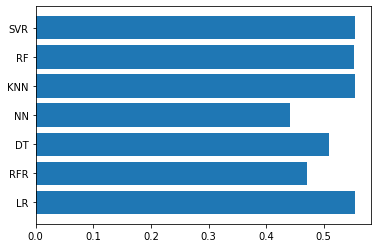

In [311]:
# //TODO: use cross-validation!!!

import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('RFR', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NN', MLPRegressor(solver = 'lbfgs', max_iter = 500)))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
#     tscv = TimeSeriesSplit(n_splits=3)
    
#     cv_results = cross_val_score(model, train_X, train_y, cv=tscv, scoring='r2')
    clf = model
    clf.fit(train_X, train_y)

    hyp = []
    for i in clf.predict(test_X):
        hyp.append(result_transfer(i))
#     print(hyp)
    
#     = clf.predict(test_X).apply(result_transfer)
#     accuracy_score(test_y, hyp)
    
    results.append(accuracy_score(test_y, hyp))
    names.append(name)
    print('%s: %f' % (name, accuracy_score(test_y, hyp)))
    
# Compare Algorithms
plt.barh(names, results)

In [312]:
# //TODO: use cross-validation!!!

In [313]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(train_X, train_y)

hyp = clf.predict(test_X)
accuracy_score(test_y, hyp)

0.5534441805225653

In [314]:
train_X.head()

,shift1high,shift2high,shift3high,shift4high,shift5high,shift1low,shift2low,shift3low,shift4low,shift5low,...,shift2open,shift3open,shift4open,shift5open,shift1close,shift2close,shift3close,shift4close,shift5close,volume
5,0.000463,0.033349,0.017415,-0.040760,-0.046503,-0.007453,-0.002962,0.052360,-0.081693,-0.043379,...,0.059838,-0.004669,-0.092806,-0.009624,-0.017700,-0.010472,0.041979,-0.010101,-0.073858,7094898
6,-0.006168,0.000460,0.033143,0.017308,-0.040508,-0.009746,-0.007380,-0.002933,0.051850,-0.080897,...,0.000093,0.058094,-0.004533,-0.090102,0.016580,-0.017993,-0.010645,0.042675,-0.010268,6211782
7,0.029671,-0.006351,0.000474,0.034126,0.017822,0.036075,-0.010097,-0.007646,-0.003039,0.053720,...,-0.029920,0.000095,0.059650,-0.004654,0.040584,0.017253,-0.018724,-0.011077,0.044407,5196798
8,0.017163,0.030180,-0.006460,0.000482,0.034712,-0.001468,0.036022,-0.010082,-0.007635,-0.003034,...,0.027566,-0.030792,0.000098,0.061388,-0.003517,0.040442,0.017193,-0.018658,-0.011038,4917877
9,0.007187,0.017287,0.030397,-0.006507,0.000486,0.024982,-0.001505,0.036922,-0.010334,-0.007826,...,0.029017,0.027459,-0.030672,0.000097,0.021147,-0.003591,0.041297,0.017556,-0.019052,9138253


In [315]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)
prediction = clf.predict(test_X)

from sklearn.metrics import accuracy_score
accuracy_score(test_y, prediction)

0.517814726840855

In [316]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(train_X, train_y)
prediction = clf.predict(test_X)

accuracy_score(test_y, prediction)

0.4643705463182898

In [317]:
df

,high,low,open,close,volume,next_2day_trend
0,52.082081,48.028027,50.050049,50.220219,44659096,1
1,54.594597,50.300301,50.555557,54.209209,22834343,0
2,56.796799,54.579578,55.430431,54.754753,18256126,0
3,55.855858,51.836838,55.675674,52.487488,15247337,1
4,54.054054,51.991993,52.532532,53.053055,9188602,1
...,...,...,...,...,...,...
4206,2335.000000,2308.280029,2328.629883,2314.770020,1331800,1
4207,2337.350098,2293.040039,2306.330078,2337.350098,1259500,0
4208,2371.250000,2346.159912,2363.889893,2351.929932,1444500,0
4209,2331.000000,2284.540039,2328.139893,2291.750000,1544900,0


# Tensorflow LSTM

In [430]:
from sklearn import preprocessing

history_points = 25

def get_features(dataset):
    data = dataset.copy()
    data = data.drop('next_2day_trend', axis=1)
    data = data.to_numpy()

    data_normaliser = preprocessing.MinMaxScaler()
    data_normalised = data_normaliser.fit_transform(data)
    
    # get the history_points * 5 features (open, clos, volum, etc) array * (rows - history_points) 
    features = np.array([data_normalised[i  : i + history_points].copy() for i in range(len(data_normalised) - history_points)])
    return features

In [431]:
df_all = df_all.iloc[50:]
print(df_all)
X = get_features(df_all)
result = df_all['next_2day_trend'].iloc[history_points:]
Y = np.expand_dims(result, axis=-1)
print(len(X))
print(len(Y))

         date         high          low         open        close    volume  \
200   12940.0   147.022018   141.056061   141.336334   145.615616  45006748   
201   12941.0   149.944946   145.295288   148.698700   146.706711  48597354   
202   12942.0   146.741745   139.139145   146.571579   139.919922  51350398   
203   12943.0   144.394394   140.420425   142.502502   143.298294  32849318   
204   12944.0   143.783783   140.150146   143.638641   141.391388  25367807   
...       ...          ...          ...          ...          ...       ...   
4206  18752.0  2335.000000  2308.280029  2328.629883  2314.770020   1331800   
4207  18753.0  2337.350098  2293.040039  2306.330078  2337.350098   1259500   
4208  18754.0  2371.250000  2346.159912  2363.889893  2351.929932   1444500   
4209  18757.0  2331.000000  2284.540039  2328.139893  2291.750000   1544900   
4210  18758.0  2279.989990  2234.369629  2243.070068  2270.060059   1709292   

            RSI        MOM      slowk      slowd   

In [471]:
from sklearn.model_selection import train_test_split
    
print(X.shape)
print(Y.shape)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
print(len(x_train))
print(len(x_test))

(3986, 25, 18)
(3986, 1)
2989
997


In [472]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras import optimizers
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, InputLayer,Embedding,SpatialDropout1D

# model definition
lstm_input = Input(shape=(history_points, 18), name='lstm_input')
x = LSTM(history_points, name='lstm_0')(lstm_input)
x = Dropout(0.2, name='lstm_dropout_0')(x)
x = Dense(32, name='dense_0')(x)
x = Activation('sigmoid', name='sigmoid_0')(x)
x = Dense(1, name='dense_1')(x)
# output = tf.nn.softmax(x)
model = Model(inputs=lstm_input, outputs=x)

adam = optimizers.Adam(lr=0.001)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [473]:
model.fit(x=x_train,
          y=y_train,
          batch_size=32,
          epochs=25)

Epoch 1/25
94/94 [==============================] - 3s 10ms/step - loss: 0.7008 - accuracy: 0.5250
Epoch 2/25
94/94 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5175
Epoch 3/25
94/94 [==============================] - 1s 10ms/step - loss: 0.6994 - accuracy: 0.5031
Epoch 4/25
94/94 [==============================] - 1s 10ms/step - loss: 0.6914 - accuracy: 0.5284
Epoch 5/25
94/94 [==============================] - 1s 10ms/step - loss: 0.6908 - accuracy: 0.5225
Epoch 6/25
94/94 [==============================] - 1s 10ms/step - loss: 0.6906 - accuracy: 0.5360
Epoch 7/25
94/94 [==============================] - 1s 10ms/step - loss: 0.6921 - accuracy: 0.5355
Epoch 8/25
94/94 [==============================] - 1s 10ms/step - loss: 0.6923 - accuracy: 0.5312
Epoch 9/25
94/94 [==============================] - 1s 12ms/step - loss: 0.6899 - accuracy: 0.5258
Epoch 10/25
94/94 [==============================] - 1s 10ms/step - loss: 0.6921 - accuracy: 0.5296
Epoch 11/

In [474]:
evaluation = model.evaluate(x_test, y_test)
print(evaluation)

32/32 [==============================] - 1s 3ms/step - loss: 0.6893 - accuracy: 0.5416
[0.6893291473388672, 0.541624903678894]


In [475]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import binarize
import math

y_pred = model.predict(x_test)

y_bin = [y > 0.5 for y in y_pred]

confusion_matrix(y_test, y_bin)

array([[ 22, 438],
       [ 19, 518]])